## Using Of SVM

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Using PIMA DataSet

In [2]:
data=pd.read_csv('./diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    squeeze: 'bool | None' = None,
    prefix: 'str | lib.NoDefault' = <no_default>,
    mangle_dupe_cols: 'bool' = True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates=None,
    infer

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 0->Non-Diabetes 1->Diabetes

In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
X=data.drop(columns='Outcome',axis=1)
Y=data['Outcome'] 

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Standardization

## Standardize features by removing the mean and scaling to unit variance.
## We can Use fit_transform() to fit and transform the data
## Standard Formula Equal To : Z = (X - mean)/std

In [11]:
scaler=StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [13]:
standardized_data=scaler.transform(X)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [15]:
X = standardized_data

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(614, 8) (154, 8) (614,) (154,)


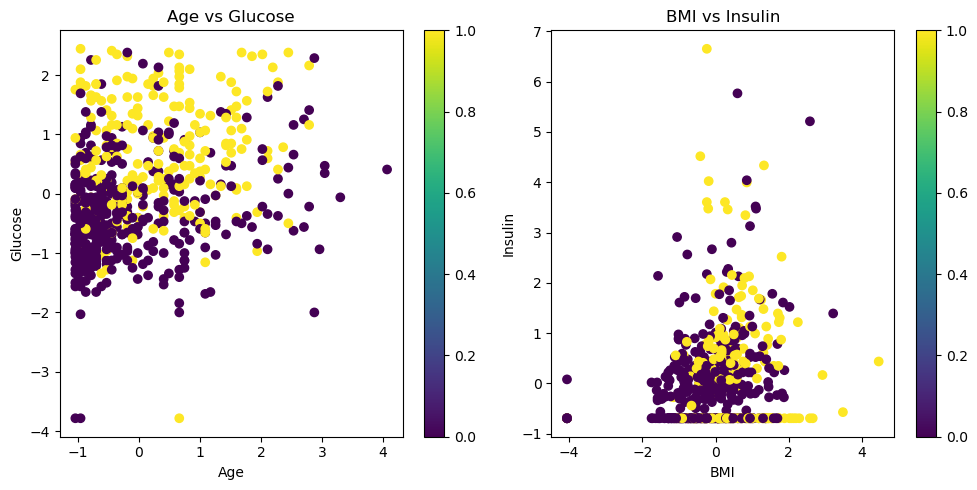

In [21]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 7], X_train[:, 1], c=Y_train, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 5], X_train[:, 4], c=Y_train, cmap='viridis')
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.title('BMI vs Insulin')
plt.colorbar()

plt.tight_layout()
plt.show()



## Train Model

## Check 10 Types Of Model Svm

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [2, 3, 4]
gammas = ['scale', 'auto']

best_accuracy = 0
best_params = {}

for kernel in kernels:
    for degree in degrees:
        for gamma in gammas:
            classifier = SVC(kernel=kernel, degree=degree, gamma=gamma)
            classifier.fit(X_train, Y_train)
            Y_pred = classifier.predict(X_test)
            accuracy = accuracy_score(Y_test, Y_pred)
            print(f'Kernel: {kernel}, Degree: {degree}, Gamma: {gamma}, Accuracy: {accuracy*100:.2f}%')
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'kernel': kernel, 'degree': degree, 'gamma': gamma}

print(f'Best Accuracy: {best_accuracy*100:.2f}% with parameters: {best_params}')


## The Best Model

In [27]:
classifier=SVC(kernel='linear')
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy*100)

77.27272727272727
